In [1]:
N = 50

R = triu(randn(N));

[Q, X] = qr(randn(N));

A = Q*R;

[Q2, R2] = qr(A);

A2 = Q2*R2;

[Q3, R3] = qr(A2);

N =  50


In [2]:
norm(R2-R)/norm(R)
norm(Q2-Q)/norm(Q)

norm(A-Q2*R2)/norm(A)

disp(norm(R3-R2)/norm(R2))



ans =  0.72134
ans =  2.0000
ans =    7.8140e-16
 0.78150


In [3]:
help norm

'norm' is a built-in function from the file libinterp/corefcn/data.cc

 -- norm (A)
 -- norm (A, P)
 -- norm (A, P, OPT)
     Compute the p-norm of the matrix A.

     If the second argument is not given, `p = 2' is used.

     If A is a matrix (or sparse matrix):

    P = `1'
          1-norm, the largest column sum of the absolute values of A.

    P = `2'
          Largest singular value of A.

    P = `Inf' or "inf"
          Infinity norm, the largest row sum of the absolute values of
          A.

    P = "fro"
          Frobenius norm of A, `sqrt (sum (diag (A' * A)))'.

    other P, `P > 1'
          maximum `norm (A*x, p)' such that `norm (x, p) == 1'

     If A is a vector or a scalar:

    P = `Inf' or "inf"
          `max (abs (A))'.

    P = `-Inf'
          `min (abs (A))'.

    P = "fro"
          Frobenius norm of A, `sqrt (sumsq (abs (A)))'.

    P = 0
          Hamming norm--the number of nonzero elements.

    other P, `P > 1'
          p-norm of A, `(sum (abs (A) .^

In [1]:
A = randn(4,3)



A =

   2.99062  -1.22870   1.52313
   1.95723   1.95455  -1.19293
   0.63928  -1.07006   0.64193
  -0.70230  -0.75718  -0.49424



In [2]:
[Q, R] = qr(A)

Q =

  -0.808676   0.462698   0.091772   0.351472
  -0.529242  -0.736288  -0.395917  -0.145026
  -0.172864   0.403031  -0.197268  -0.876795
   0.189906   0.285232  -0.892140   0.294390

R =

  -3.69817   0.00037  -0.80519
   0.00000  -2.65487   1.70083
   0.00000   0.00000   0.92638
   0.00000   0.00000   0.00000



In [7]:
Q*R(:,3)
A(:,3)

ans =

   1.52313
  -1.19293
   0.64193
  -0.49424

ans =

   1.52313
  -1.19293
   0.64193
  -0.49424



In [16]:
%A = diag(randn(4,1)) + diag(rand(3,1),-1) + diag(rand(3,1),1)

[Q, R] = qr(A)

A =

   0.61546   0.87144   0.00000   0.00000
   0.27518   0.98192   0.44691   0.00000
   0.00000   0.15934  -0.42531   0.62984
   0.00000   0.00000   0.89551  -1.74305

Q =

  -0.91291   0.39152  -0.05821   0.09962
  -0.40817  -0.87568   0.13019  -0.22280
  -0.00000  -0.28267  -0.48395   0.82819
  -0.00000  -0.00000   0.86340   0.50452

R =

  -0.67417  -1.19633  -0.18241   0.00000
   0.00000  -0.56370  -0.27112  -0.17804
   0.00000   0.00000   1.03719  -1.80976
   0.00000   0.00000   0.00000  -0.35779



In [23]:
function [Fy] = house(x, y) 
    
    v = [norm(x) - x(1);-x(2:end)];
    
    Fy = y - 2*v*(v'*y)/(v'*v);
    
endfunction



In [28]:
A
A1 = house(A(:,1), A)
A2 = A1;
A2(2:end, 2:end) = house(A1(2:end,2), A1(2:end,2:end));
A2
A3 = A2;
A3(3:end, 3:end) = house(A2(3:end,3), A2(3:end,3:end));
A3

[Q, R] = qr(A);
R

A =

   0.61546   0.87144   0.00000   0.00000
   0.27518   0.98192   0.44691   0.00000
   0.00000   0.15934  -0.42531   0.62984
   0.00000   0.00000   0.89551  -1.74305

A1 =

   0.67417   1.19633   0.18241   0.00000
   0.00000  -0.54071  -0.40798   0.00000
   0.00000   0.15934  -0.42531   0.62984
   0.00000   0.00000   0.89551  -1.74305

A2 =

   0.67417   1.19633   0.18241   0.00000
   0.00000   0.56370   0.27112   0.17804
   0.00000   0.00000  -0.52329   0.60415
   0.00000   0.00000   0.89551  -1.74305

A3 =

   0.67417   1.19633   0.18241   0.00000
   0.00000   0.56370   0.27112   0.17804
   0.00000   0.00000   1.03719  -1.80976
   0.00000   0.00000  -0.00000  -0.35779

R =

  -0.67417  -1.19633  -0.18241   0.00000
   0.00000  -0.56370  -0.27112  -0.17804
   0.00000   0.00000   1.03719  -1.80976
   0.00000   0.00000   0.00000  -0.35779



In [48]:
function [Fy] = house(x, y) 
    v = [norm(x) - x(1);-x(2:end)];    
    Fy = y - 2*v*(v'*y)/(v'*v);    
endfunction

function [R] = householderQR(A)
    [m,n] = size(A);
    R = A;
    for i=1:min(n,m-1),
        R
        R(i:end, i:end) = house(R(i:end,i), R(i:end,i:end));
    end
endfunction

In [51]:
A = randn(3,7);
R = householderQR(A)

R =

   1.260086  -0.474529  -0.359320  -1.253049   1.795843  -0.885593   0.064954
   0.218599  -1.216409   0.577179  -0.329480  -0.511957   0.271256   0.420366
   0.428878  -0.785777   1.428254   0.509158  -0.077030   1.739770   0.205199

R =

 Columns 1 through 6:

   1.3489e+00  -8.9025e-01   2.1198e-01  -1.0621e+00   1.5701e+00  -2.3017e-01
   1.1102e-16  -1.9323e-01  -8.2893e-01  -7.9957e-01   4.3550e-02  -1.3419e+00
   2.2204e-16   1.2216e+00  -1.3304e+00  -4.1312e-01   1.0128e+00  -1.4251e+00

 Column 7:

   1.9404e-01
   1.0265e-01
  -4.1814e-01

R =

   1.34890  -0.89025   0.21198  -1.06205   1.57014  -0.23017   0.19404
   0.00000   1.23683  -1.18461  -0.28313   0.99360  -1.19799  -0.42905
   0.00000   0.00000  -1.02661  -0.85429   0.20125  -1.54807   0.03606



In [52]:
[Q,R] = qr(A);
R

R =

  -1.34890   0.89025  -0.21198   1.06205  -1.57014   0.23017  -0.19404
   0.00000   1.23683  -1.18461  -0.28313   0.99360  -1.19799  -0.42905
   0.00000   0.00000   1.02661   0.85429  -0.20125   1.54807  -0.03606



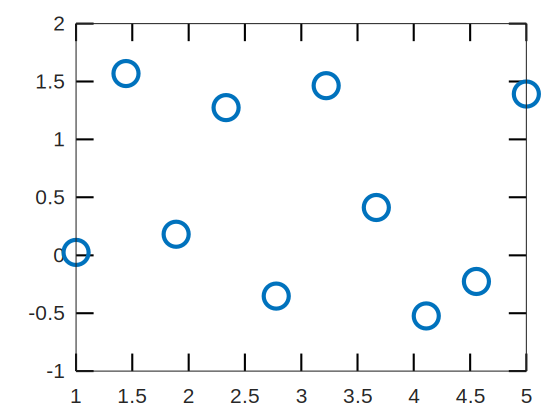

In [61]:
x = linspace(1,5,10);
y = randn(size(x))';



plot(x, y, 'o')

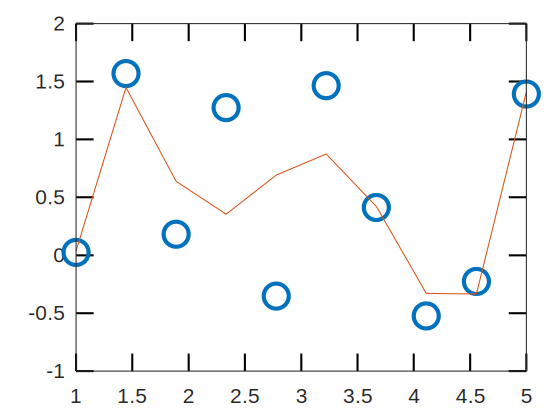

In [65]:
A = vander(x,7);
[Q, R] = qr(A, 0);

%ws = inv(A'*A)*A'*y;

fs = Q*Q'*y;

plot(x, y, 'o', x, fs, '-')


In [60]:
y

y =

 Columns 1 through 8:

   0.37317   0.32152  -1.31822  -0.55817  -0.52777  -0.17933   0.14712   1.07511

 Columns 9 and 10:

   0.71900  -0.68532



In [54]:
help vander

'vander' is a function from the file /usr/local/Cellar/octave/4.2.1_1/share/octave/4.2.1/m/special-matrix/vander.m

 -- vander (C)
 -- vander (C, N)
     Return the Vandermonde matrix whose next to last column is C.

     If N is specified, it determines the number of columns; otherwise,
     N is taken to be equal to the length of C.

     A Vandermonde matrix has the form:

          c(1)^(n-1) ... c(1)^2  c(1)  1
          c(2)^(n-1) ... c(2)^2  c(2)  1
              .     .      .      .    .
              .       .    .      .    .
              .         .  .      .    .
          c(n)^(n-1) ... c(n)^2  c(n)  1

     See also: polyfit.


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.
